<a href="https://colab.research.google.com/github/mgncodes/MLShortProjects/blob/master/Cartoonize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing required packages

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

setting parameters, reading and resizing image

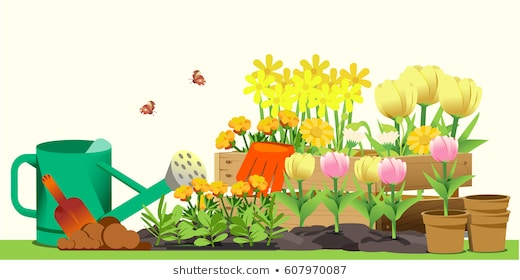

(280, 520, 3)


In [ ]:
# no. of downsampling steps (downsampling: reducing the resolution of image with 2D repn.)
num_down = 2
# no. of bilateral filtering steps (bilateral filtering: to reduce the noise in the image)
num_bilateral = 7

img_rgb = cv2.imread("garden.jpg")
cv2_imshow(img_rgb)
print(img_rgb.shape) # dimension of the picture

#resizing the image
img_rgb = cv2.resize(img_rgb, (600, 600))


downsampling, applying bilateral filter 'num_bilateral' times

In [ ]:
#downsampling image using gaussian pyramid
img_color = img_rgb
for x in range(num_down):
  img_color = cv2.pyrDown(img_color)

#applying small bilateral filter 'num_bilateral' times, instead of one large filter
for x in range(num_bilateral):
  img_color = cv2.bilateralFilter(img_color, 9, 9, 7)

upsampling, grayscaling, median blur and thresholding

In [ ]:
#upsampling image to original size
for x in range(num_down):
  img_color = cv2.pyrUp(img_color)

#converting image to grayscale
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
img_blur = cv2.medianBlur(img_gray, 7)

#apply median blur and thresholding
img_edge = cv2.adaptiveThreshold(img_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blockSize = 9, C = 2)

displaying resultant image using bitwise-AND

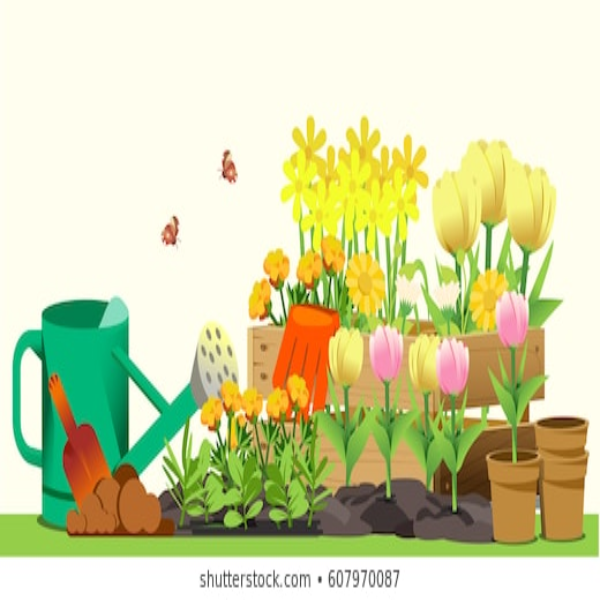

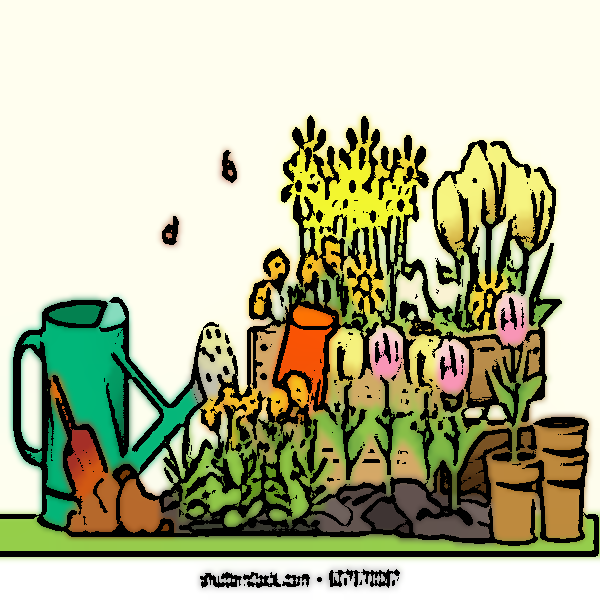

In [ ]:
#converting back to color, bitwise-AND with color image
img_edge = cv2.cvtColor(img_edge, cv2.COLOR_GRAY2RGB)
img_cartoon = cv2.bitwise_and(img_color, img_edge)

#display image
cv2_imshow(img_rgb)
cv2_imshow(img_cartoon)